# Búsqueda de Trabajo Secuencial Óptima

Mauricio M. Tejada

ILADES - Universidad Alberto Hurtado

Septiembre, 2017

---

## Modelo con Búsqueda en el Trabajo (On th Job Search)

Buscamos resolver la siguiente ecuación de Bellman:
$$
R=b+(\alpha_0 - \alpha_1)\int_{R}^{\overline{w}}\frac{(1-F(w))}{r+\lambda+\alpha_1(1-F(w))}dw
$$
Como antes, suponemos que $\log w \sim N(\mu,\sigma)$ y que $\overline{w}=\infty$

In [1]:
# Cargamos modulos necesarios
%matplotlib inline
import scipy.stats as stats
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt  

In [2]:
# Definición de Parámetros
b  = 1.0
α0 = 0.30
α1 = 0.02
r  = 0.1
λ  = 0.01
μ  = 0.8
σ  = 0.5
F = stats.lognorm(s = σ, loc = 0, scale = np.exp(μ))

Escribimos una función que, dados los parámetros, resuelve el salario de reserva iterando la ecuación de Bellman anterior:

In [3]:
def SolveModelOJS(parametrization, R0=1, tol=0.00001, step=0.5):
    b, α0, α1, r, λ, F = parametrization
    diff = 10
    
    integrando = lambda x: (1 - F.cdf(x))/(r + λ + α1*(1-F.cdf(x)))
    
    while diff > tol:
        R1   = b + (α0 - α1)*integrate.quad(integrando, R0, np.inf)[0]
        diff = np.abs(R1-R0)
        R0   = R0 + step*(R1-R0)
        
    h = α0*(1-F.cdf(R1))
    
    return R1, h

Probemos ahora la función con la parametrización inicial:

In [4]:
parm = [b, α0, α1, r, λ, F]    # Lista con la parametrización inicial

Req, hueq = SolveModelOJS(parm)
print("El salario de reserva es: ", Req)  
print("La duración promedio del desempleo es: ", 1/hueq) 

El salario de reserva es:  2.372716502901918
La duración promedio del desempleo es:  7.42313801263


#### Efecto de un cambio de ingresos (desutilidad) de los desempleados

Ahora resolvamos el modelo para $b \in [0,2]$:

In [5]:
b_values  = np.linspace(0,2,10)
R_values_b = np.zeros(len(b_values))
h_values_b = np.zeros(len(b_values))

for i in range(len(b_values)):
    parmi = [b_values[i], α0, α1, r, λ, F]
    R_values_b[i], h_values_b[i] = SolveModelOJS(parmi)[0:2]

Graficamos el efecto sobre el salarios de reserva:

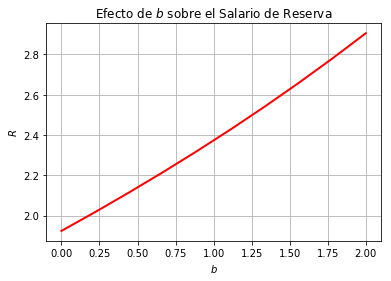

In [6]:
plt.plot(b_values, R_values_b, 'r-', linewidth=2)
plt.xlabel(r'$b$')
plt.ylabel(r'$R$')
plt.title('Efecto de '+r'$b$'+' sobre el Salario de Reserva')
plt.grid(True)
plt.show()

Graficamos el efecto sobre la probabilidad de salir del desempleo:

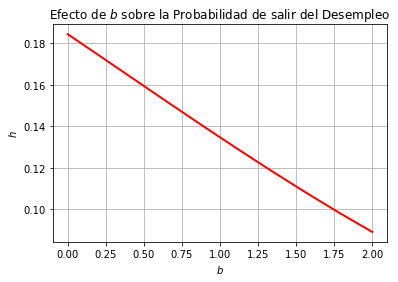

In [7]:
plt.plot(b_values, h_values_b, 'r-', linewidth=2)
plt.xlabel(r'$b$')
plt.ylabel(r'$h$')
plt.title('Efecto de '+r'$b$'+' sobre la Probabilidad de salir del Desempleo')
plt.grid(True)
plt.show()

#### Efecto de un cambio de la tasa a la cuál llegan las ofertas laborales en el estado de desempleo

Ahora resolvamos el modelo para $\alpha_0 \in [0,1]$:

In [8]:
α0_values  = np.linspace(0,1,20)
R_values_α0  = np.zeros(len(α0_values))
h_values_α0  = np.zeros(len(α0_values))

for i in range(len(α0_values)):
    parmi = [b, α0_values[i], α1, r, λ, F]
    R_values_α0[i], h_values_α0[i] = SolveModelOJS(parmi)[0:2]

Graficamos el efecto sobre el salarios de reserva:

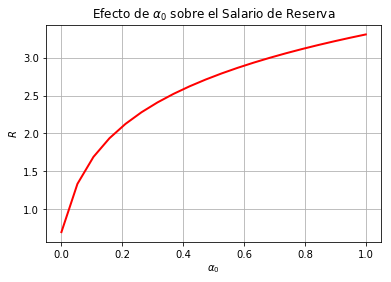

In [9]:
plt.plot(α0_values, R_values_α0, 'r-', linewidth=2)
plt.xlabel(r'$\alpha_0$')
plt.ylabel(r'$R$')
plt.title('Efecto de '+r'$\alpha_{0}$'+' sobre el Salario de Reserva')
plt.grid(True)
plt.show()

Graficamos el efecto sobre la probabilidad de salir del desempleo:

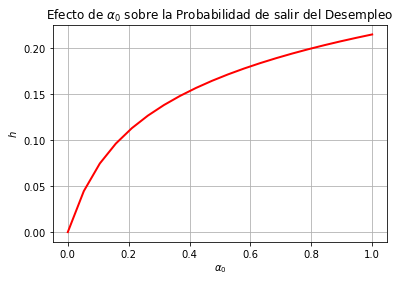

In [10]:
plt.plot(α0_values, h_values_α0, 'r-', linewidth=2)
plt.xlabel(r'$\alpha_0$')
plt.ylabel(r'$h$')
plt.title('Efecto de '+r'$\alpha_0$'+' sobre la Probabilidad de salir del Desempleo')
plt.grid(True)
plt.show()

#### Efecto de un cambio de la tasa a la cuál llegan las ofertas laborales en el estado de desempleo

Ahora resolvamos el modelo para $\alpha_1 \in [0,\alpha_0]$:

In [11]:
α1_values  = np.linspace(0,α0,20)
R_values_α1  = np.zeros(len(α1_values))
h_values_α1  = np.zeros(len(α1_values))

for i in range(len(α1_values)):
    parmi = [b, α0, α1_values[i], r, λ, F]
    R_values_α1[i], h_values_α1[i] = SolveModelOJS(parmi)[0:2]

Graficamos el efecto sobre el salarios de reserva:

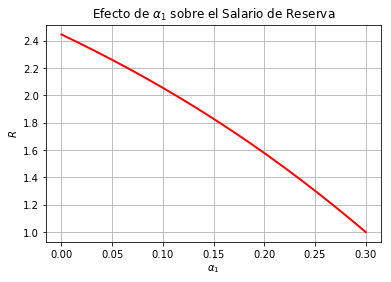

In [12]:
plt.plot(α1_values, R_values_α1, 'r-', linewidth=2)
plt.xlabel(r'$\alpha_1$')
plt.ylabel(r'$R$')
plt.title('Efecto de '+r'$\alpha_{1}$'+' sobre el Salario de Reserva')
plt.grid(True)
plt.show()

Graficamos el efecto sobre la probabilidad de salir del desempleo:

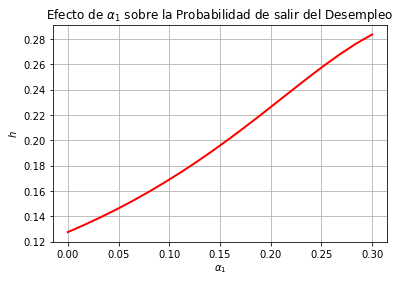

In [13]:
plt.plot(α1_values, h_values_α1, 'r-', linewidth=2)
plt.xlabel(r'$\alpha_1$')
plt.ylabel(r'$h$')
plt.title('Efecto de '+r'$\alpha_1$'+' sobre la Probabilidad de salir del Desempleo')
plt.grid(True)
plt.show()

#### Distribución de Salarios Aceptados

La distribución de salarios aceptados se deriva de la distribución de salarios $F(w)$. En particular, dicha distribución es $F(w)$ truncada a la izquierda al salario de reserva $R$.   La función de densidad es:
$$f_{A}(w) = f(w|w \geq R )= \frac{f(w)}{1-F(R)}$$
La función acumulada en tanto es:
$$F_{A}(w) = \int^{w}_{R} f(w|w \geq R ) = \frac{F(w)-F(R)}{1-F(R)}$$

In [14]:
# Función para obtener números aleatorios de una distribución truncada a la izquierda

def randTruncDist(Distribution, TruncPoint, Ndraws):
    """ Random numbers from a truncated distribuion
    
    Distribution: Distribution Object (stats.scipy)
    TruncPoint: Truncation point (left truncation)
    Ndraws: Number of draws
    
    """
    cdfTruncPoint = Distribution.cdf(TruncPoint)
    drawsU = cdfTruncPoint  + (1 - cdfTruncPoint)*np.random.rand(Ndraws)
    return Distribution.ppf(drawsU)

Comparemos ahora las distribuciones de salarios aceptados y ofrecidos generando 10000 números aleatorios de ambas distribuciones.

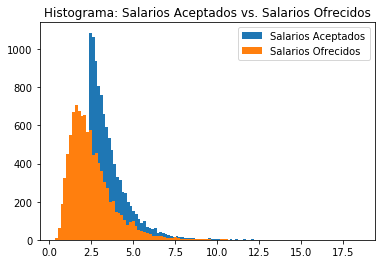

In [15]:
Ndraws = 10000
obswages = randTruncDist(F,Req,Ndraws)
wages    = F.rvs(Ndraws)

# Histograma
plt.hist(obswages, bins=100, label='Salarios Aceptados')
plt.hist(wages, bins=100, label='Salarios Ofrecidos')
plt.title('Histograma: Salarios Aceptados vs. Salarios Ofrecidos')
plt.legend()
plt.show()